# IMDB를 LSTM으로 학습시키기
- IMDB는 인터넷 영화 데이터베이스(Internet Movie Database)에서 가져온 리뷰 5만 개로 이루어져 있다. 이 데이터셋은 훈련 데이터 25,000개와 테스트 데이터 25,000개로 나누어져 있으며 각각 50%는 긍정, 나머지 50%는 부정 리뷰로 구성되어 있다.
- IMDB 학습의 목적은 IMDB의 리뷰 텍스트를 기반으로 영화 리뷰를 긍정과 부정으로 분류하는 것이다.

### 데이터 로딩
가장 빈번한 10000개의 단어를 사용

In [1]:
from keras.datasets import imdb

max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

Using TensorFlow backend.


데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스


### 데이터 전처리
데이터의 길이를 500으로 맞춘다.

In [2]:
from keras.preprocessing import sequence

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


### 모델 생성
Embedding -> LSTM -> Sigmoid Dense

Embedding 층에서는 10000개의 단어가 32개의 시퀀스로 임베딩된다.

임베딩된 데이터는 LSTM 층으로 전달되어 RNN으로 처리된다.

처리된 데이터는 Sigmoid 함수를 통해 출력되게 된다.

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

W0805 02:24:16.361418 10752 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 02:24:16.378919 10752 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 02:24:16.380954 10752 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 02:24:16.549466 10752 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 02:24:16.569416 10752 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anac

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


### 훈련

In [4]:
history = model.fit(input_train, y_train, epochs=25, batch_size=128, validation_split=0.2)

W0805 02:24:17.135942 10752 deprecation_wrapper.py:119] From C:\Users\gjbr5\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 48s 2ms/step - loss: 0.4981 - acc: 0.7670 - val_loss: 0.4197 - val_acc: 0.8080
Epoch 2/25
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2927 - acc: 0.8850 - val_loss: 0.2966 - val_acc: 0.8762
Epoch 3/25
20000/20000 [==============================] - 53s 3ms/step - loss: 0.2352 - acc: 0.9116 - val_loss: 0.2925 - val_acc: 0.8842
Epoch 4/25
20000/20000 [==============================] - 57s 3ms/step - loss: 0.2024 - acc: 0.9246 - val_loss: 0.2930 - val_acc: 0.8796
Epoch 5/25
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1746 - acc: 0.9372 - val_loss: 0.2903 - val_acc: 0.8860
Epoch 6/25
20000/20000 [==============================] - 55s 3ms/step - loss: 0.1595 - acc: 0.9437 - val_loss: 0.3892 - val_acc: 0.8458
Epoch 7/25
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1427 - acc: 0.9503 - val_loss: 0.4130 - val_acc:

### 도식화
훈련 결과를 그래프로 출력한다.

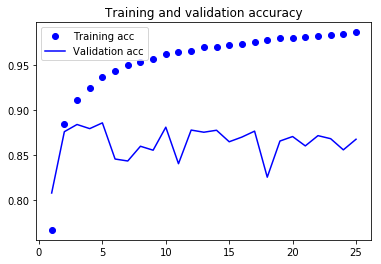

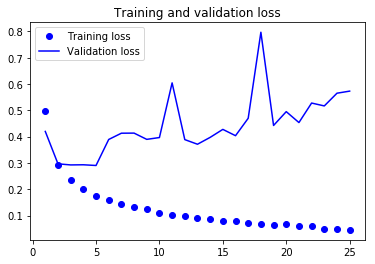

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()